<a href="https://colab.research.google.com/github/CSSamarasinghe/SE4050_Assignment/blob/IT21263194/DL_ASSIGNMENT_Change1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import necessary libraries
import tensorflow as tf
from tensorflow.keras.datasets import imdb

# Load the IMDB dataset
# num_words=10000 keeps the top 10,000 most frequent words in the training data
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=None)

# Display the shape of training and testing data
print(f"Training entries: {len(X_train)}, labels: {len(y_train)}")
print(f"Test entries: {len(X_test)}, labels: {len(X_test)}")


print(f"Number of unique words in the training data: {len(set([word for seq in X_train for word in seq]))}")

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Training entries: 25000, labels: 25000
Test entries: 25000, labels: 25000
Number of unique words in the training data: 88585


In [2]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Set a maximum length for reviews (e.g., 200 words)
maxlen = 200

# Pad sequences so that they all have the same length
X_train = pad_sequences(X_train, maxlen=maxlen)
X_test = pad_sequences(X_test, maxlen=maxlen)

# Check the shape after padding
print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")


Shape of X_train: (25000, 200)
Shape of X_test: (25000, 200)


In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout

# Define the model
model = Sequential()

# Add an Embedding layer
# Use the full vocabulary (vocabulary size is the maximum word index + 1)
vocab_size = max([max(seq) for seq in X_train]) + 1
model.add(Embedding(input_dim=vocab_size, output_dim=128, input_length=maxlen))

# Add an LSTM layer
model.add(LSTM(units=128, return_sequences=False))

# Add a Dropout layer to prevent overfitting
model.add(Dropout(0.5))

# Add a Dense layer for binary classification
model.add(Dense(units=1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Display the model architecture
model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [4]:
# Train the model
history = model.fit(X_train, y_train, epochs=5, batch_size=64, validation_split=0.2)


Epoch 1/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 254s 801ms/step - accuracy: 0.6809 - loss: 0.5725 - val_accuracy: 0.8596 - val_loss: 0.3422
Epoch 2/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 258s 824ms/step - accuracy: 0.9206 - loss: 0.2159 - val_accuracy: 0.8672 - val_loss: 0.3213
Epoch 3/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 259s 816ms/step - accuracy: 0.9606 - loss: 0.1166 - val_accuracy: 0.8552 - val_loss: 0.4047
Epoch 4/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 250s 777ms/step - accuracy: 0.9755 - loss: 0.0751 - val_accuracy: 0.8608 - val_loss: 0.4303
Epoch 5/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 265s 848ms/step - accuracy: 0.9867 - loss: 0.0405 - val_accuracy: 0.8422 - val_loss: 0.5500


In [5]:
# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(X_test, y_test)

# Print the results
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Test Loss: {test_loss:.4f}")


782/782 ━━━━━━━━━━━━━━━━━━━━ 98s 125ms/step - accuracy: 0.8238 - loss: 0.6402
Test Accuracy: 0.8216
Test Loss: 0.6479


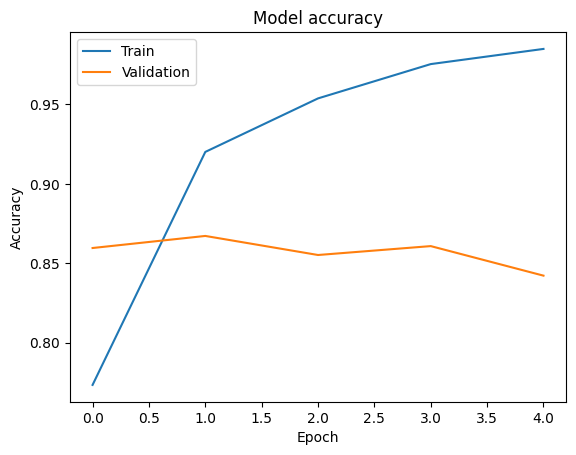

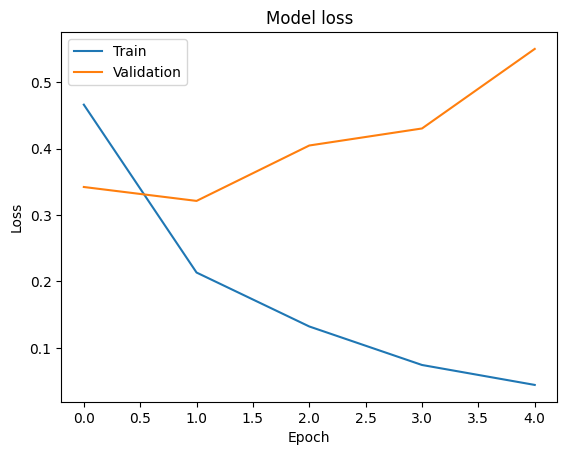

In [6]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
